### Import and Read ###

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer 
from datetime import datetime 
import nbformat

In [2]:
#Read In Dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('marketing_campaign.csv',
                           delimiter='\t', index_col='ID')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# fix date to show m d y from d m y
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%m-%d-%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m-%d-%Y')

In [4]:
# Get answers to questions on the dataset
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])
print('Unique values in marital status column: ', df['Marital_Status'].unique())

Number of rows:  2240
Number of columns:  28
Unique values in marital status column:  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [5]:
print('Shape of the dataset: ', df.shape)
print('Number of missing values: ', df.isnull().sum().sum())
print('Number of duplicated rows: ', df.duplicated().sum())

Shape of the dataset:  (2240, 28)
Number of missing values:  24
Number of duplicated rows:  182


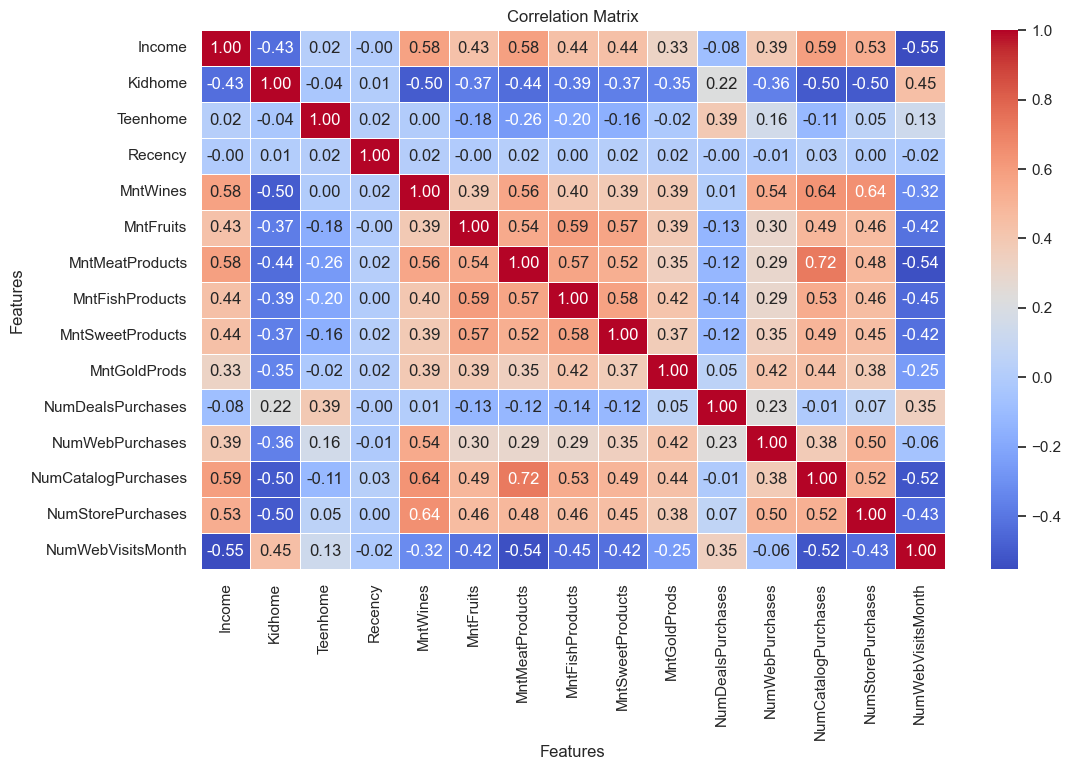

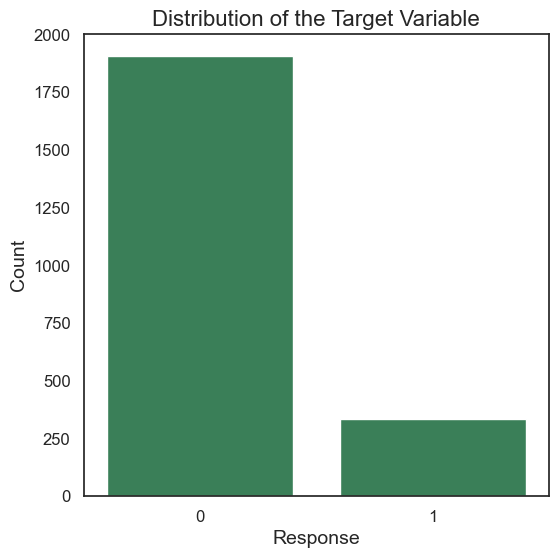

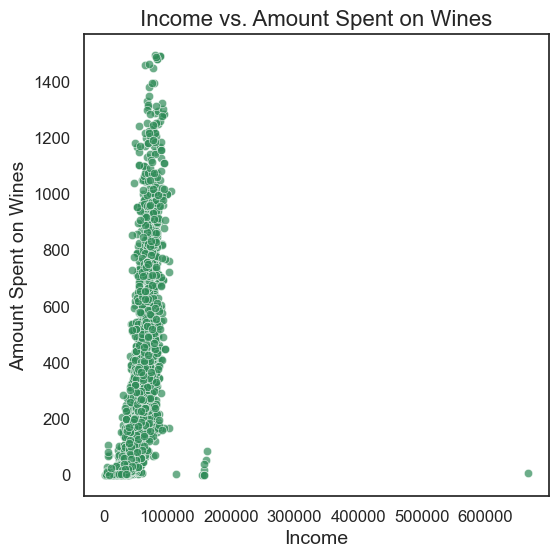

In [6]:
# Generate the correlation matrix
corr = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']].corr()

# Create a heatmap with a coolwarm color map
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Add title and axis labels
ax.set_title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

# Create a barplot to check the distribution of the target variable
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Response', data=df, ax=ax, color='seagreen')

# Add title and axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Distribution of the Target Variable', fontsize=16)
ax.set_xlabel('Response', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.show()

# Create a scatterplot to check income vs amount spent on wines
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='Income', y='MntWines', data=df, ax=ax, color='seagreen', alpha=0.7)

# Add title and axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Income vs. Amount Spent on Wines', fontsize=16)
ax.set_xlabel('Income', fontsize=14)
ax.set_ylabel('Amount Spent on Wines', fontsize=14)

plt.show()

In [7]:
# impute missing values in the income column with the median income to avoid outliers
df['Income'] = df['Income'].fillna(df['Income'].median())

#### Attribute Information ####

- People
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if customer complained in the last 2 years, 0 otherwise.
- Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years
- Promotion
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Place
    - NumWebPurchases: Number of purchases made through the company’s web site
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s web site in the last month


In [8]:
# convert education column to numerical values
df['Education'] = df['Education'].map({'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4})

### Feature Engineering from observations ###

In [9]:
# create feature engineering dataframe
df_fe = df.copy()

#Create 'Age' feature from customer's birth year
df_fe['Age'] = df_fe.Year_Birth.apply(lambda x: 2021 - int(x))

#Create 'Days_Since_Customer' feature from time the customer enrolled
df_fe['Dt_Customer'] = pd.to_datetime(df_fe.Dt_Customer)
now = datetime.now()
df_fe['Days_Since_Customer'] = df_fe.Dt_Customer.apply(lambda x: (now - x).total_seconds()/ (60 * 60 * 24))

#Create 'Fam_Size' feature from the marriage status, number of kids/teens
marital_map = {'Absurd': 1, 'Alone': 1, 'YOLO': 1, 'Single': 1,
              'Married': 2, 'Together': 2, 'Widow': 1, 'Divorced': 1}
df_fe['Marital_Status'] = df_fe.Marital_Status.map(marital_map) #Maps all singles as 1, couples as 2
df_fe['Num_Kids'] = df_fe.Kidhome.values + df_fe.Teenhome.values
df_fe['Fam_Size'] = df_fe.Marital_Status.values + df_fe.Num_Kids.values

#Create 'Num_Accepted' feature from the sum of previous marketting campaigns that were accepted by the customer
df_fe['Num_Accepted'] = df_fe.AcceptedCmp1.values + df_fe.AcceptedCmp2.values + \
                                df_fe.AcceptedCmp3.values + df_fe.AcceptedCmp4.values + \
                                df_fe.AcceptedCmp5.values

#Create 'MntTotal' for total amount spent on all items
df_fe['MntTotal'] = df_fe['MntWines'].values + df_fe['MntFruits'].values + \
                            df_fe['MntMeatProducts'].values + df_fe['MntFishProducts'].values + \
                            df_fe['MntWines'].values + df_fe['MntSweetProducts'].values + \
                            df_fe['MntGoldProds'].values

#Drops the unnecessary features from the original dataset
df_fe.drop(['Dt_Customer', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome', 'Teenhome',
                   'Z_CostContact', 'Z_Revenue', 'Num_Kids', 'Marital_Status'],
                   axis=1, inplace=True)

In [10]:
df_fe.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Fam_Size,Num_Accepted,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,64,3865.086602,1,0,2252
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,67,3315.086602,3,0,38
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,56,3514.086602,2,0,1202
6182,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,37,3341.086602,3,0,64
5324,4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,40,3363.086602,3,0,595


In [11]:
# save the df_fe dataframe to a csv file
df_fe.to_csv('mc_FE.csv', index=False)

### Some Visualizations ###

In [12]:
#Calculate percent of responses to the marketing campaign
pos_resp = df_fe.Response.sum()
total = df_fe.shape[0]
percent = round((pos_resp / total)*100, 2)

print(pos_resp, 'customers responded to the marketing campaign out of a total of', total, 'cutomers.')
print('Percent Responded: ' +  str(percent) + '%')

334 customers responded to the marketing campaign out of a total of 2240 cutomers.
Percent Responded: 14.91%


Correlation Coefficients for 'Response'
--------------------------------------------------------
Num_Accepted           0.426035
MntTotal               0.265518
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
Days_Since_Customer    0.194481
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.132867
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
Education              0.098945
NumStorePurchases      0.039363
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Age                   -0.021325
Recency               -0.198437
Fam_Size              -0.219440
Name: Response, dtype: float64


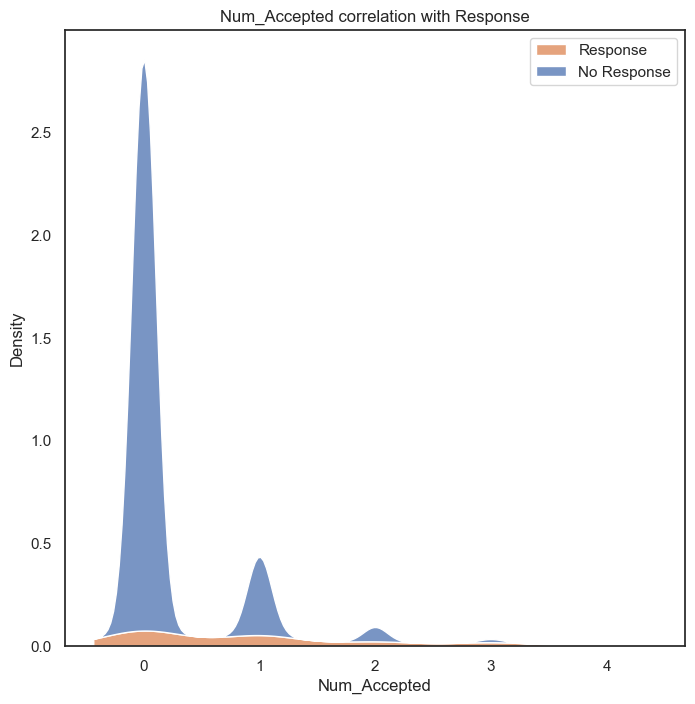

count    2240.000000
mean        0.297768
std         0.678381
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Num_Accepted, dtype: float64
Correlation %: 42.6
------------------------------------------------------------------------


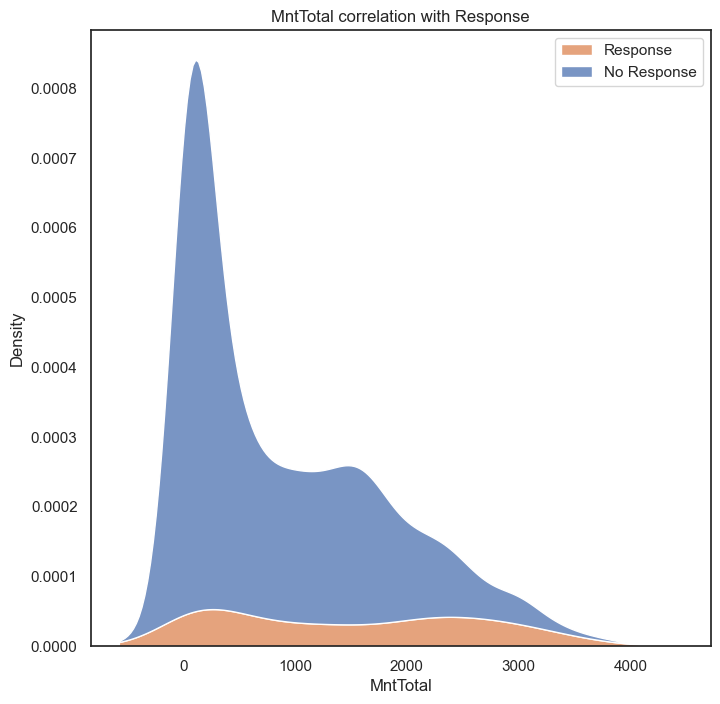

count    2240.000000
mean      909.733929
std       915.194547
min         7.000000
25%        90.750000
50%       579.500000
75%      1546.500000
max      3880.000000
Name: MntTotal, dtype: float64
Correlation %: 26.55
------------------------------------------------------------------------


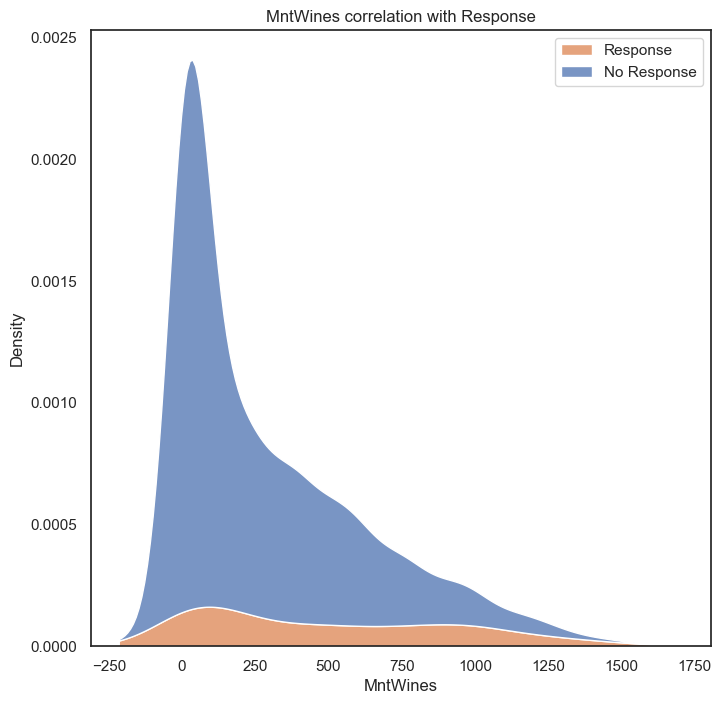

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64
Correlation %: 24.73
------------------------------------------------------------------------


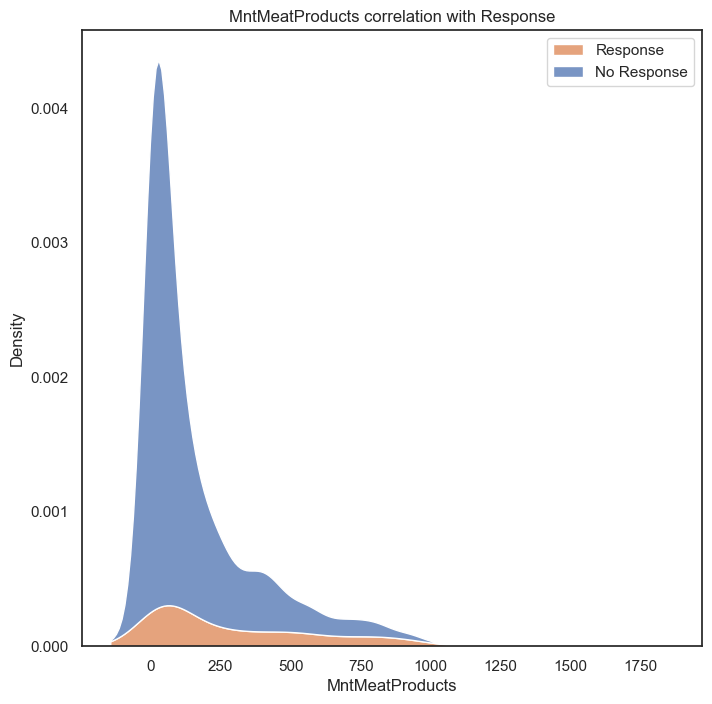

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64
Correlation %: 23.63
------------------------------------------------------------------------


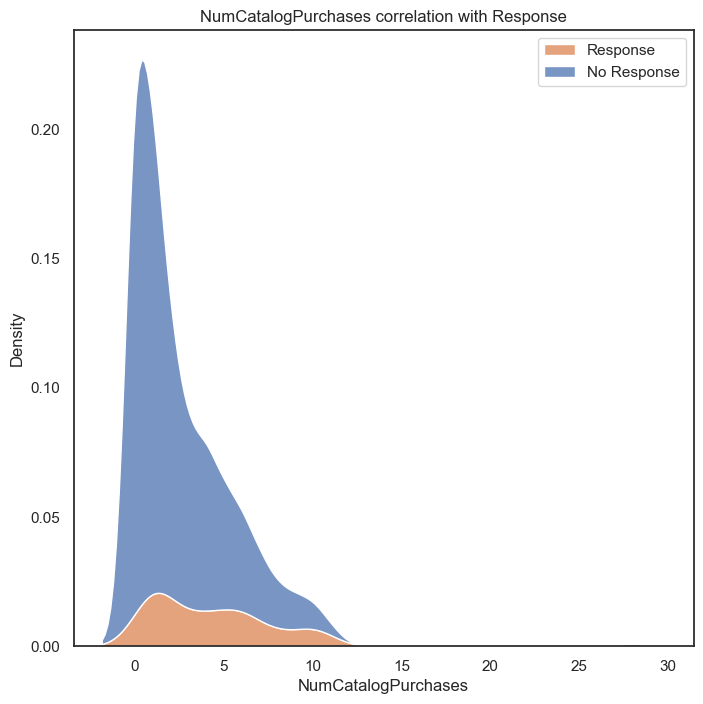

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64
Correlation %: 22.08
------------------------------------------------------------------------


In [14]:
#View feature correlations with the 'Response' column
#Note: 'Response' will be the target for predictive modeling
response_corr_abs = np.abs(df_fe.corr()['Response']).sort_values(ascending=False)[1:]
response_corr = df_fe.corr()['Response'].sort_values(ascending=False)[1:]
print("Correlation Coefficients for 'Response'")
print('--------------------------------------------------------')
print(response_corr)

#Creates function to display kde graphs
def display_kdeplot(df, col1, col2):
    plt.figure(figsize=(8,8))
    sns.kdeplot(data=df, x=col1, hue=col2, multiple="stack")
    plt.title(col1 + ' correlation with ' + col2)
    plt.legend(['Response', 'No Response'])
    plt.show()
    print(df[col1].describe())


for i in range(5):
    feature_name = response_corr_abs.index[i]
    display_kdeplot(df_fe, feature_name, 'Response')
    print('Correlation %:', round(response_corr[feature_name] * 100, 2))
    print('------------------------------------------------------------------------')


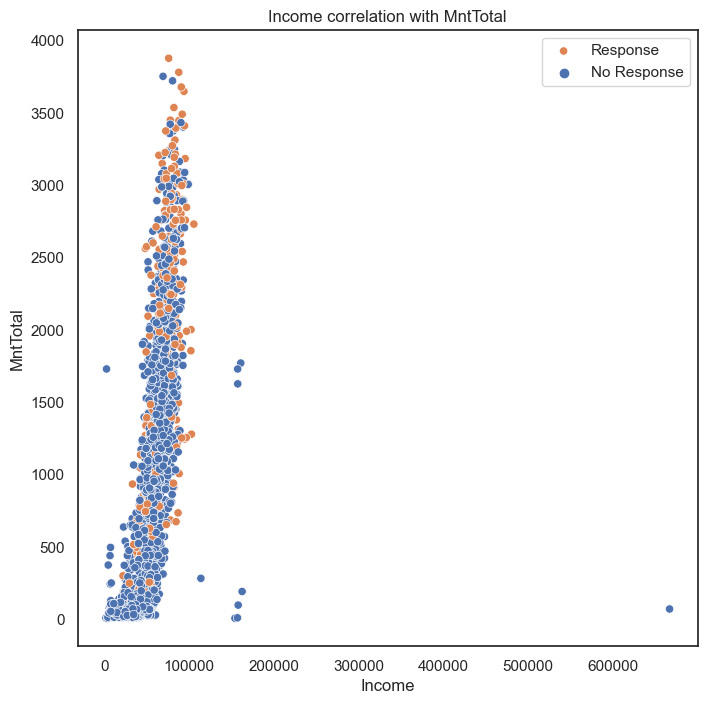

Correlation Coefficient %: 0.65
-----------------------------------------------------------


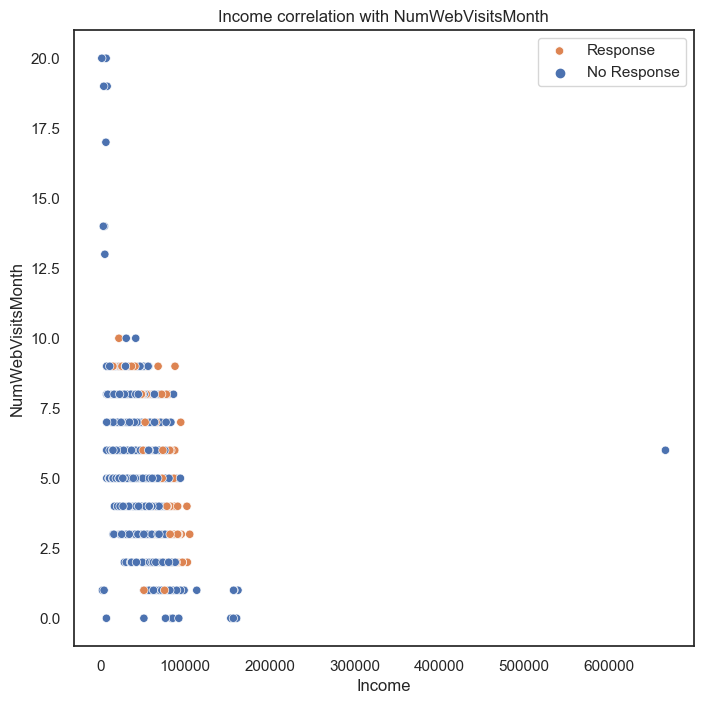

Correlation Coefficient %: -0.55
-----------------------------------------------------------


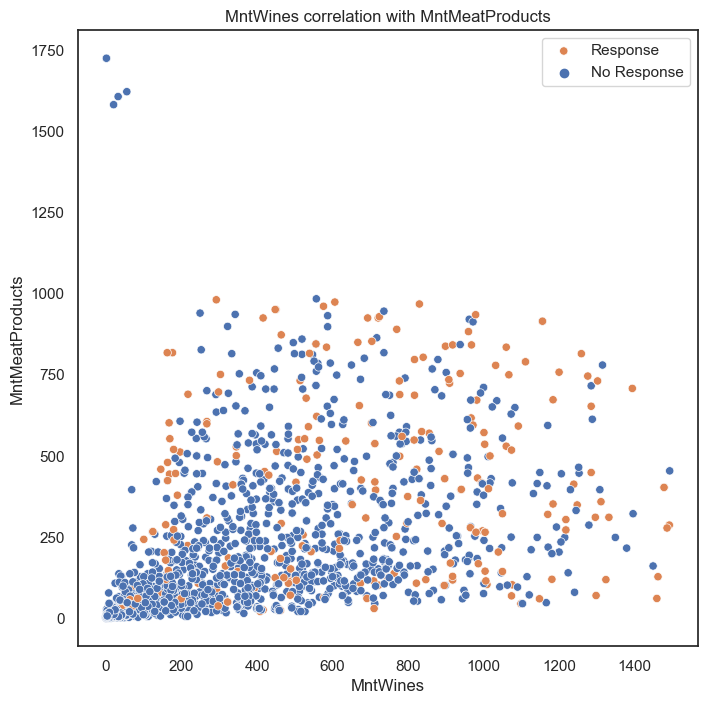

Correlation Coefficient %: 0.56
-----------------------------------------------------------


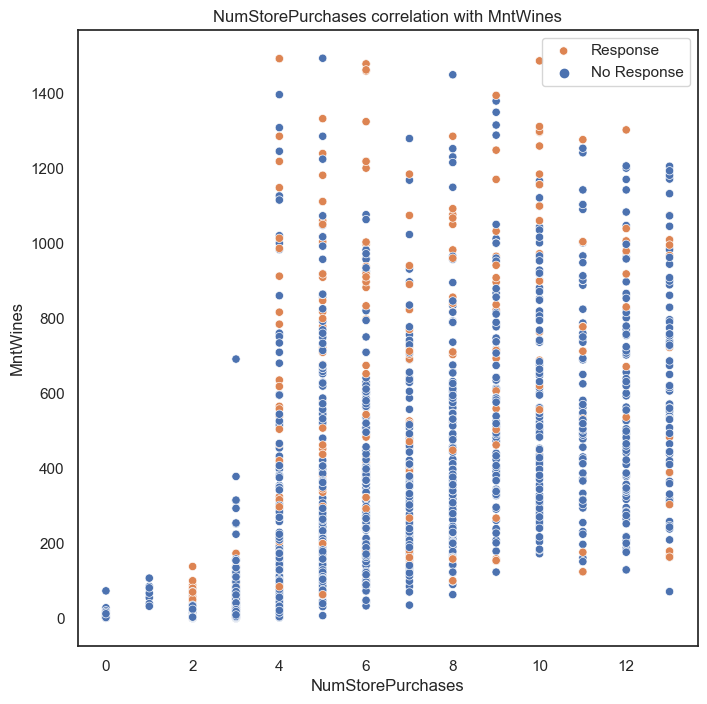

Correlation Coefficient %: 0.64
-----------------------------------------------------------


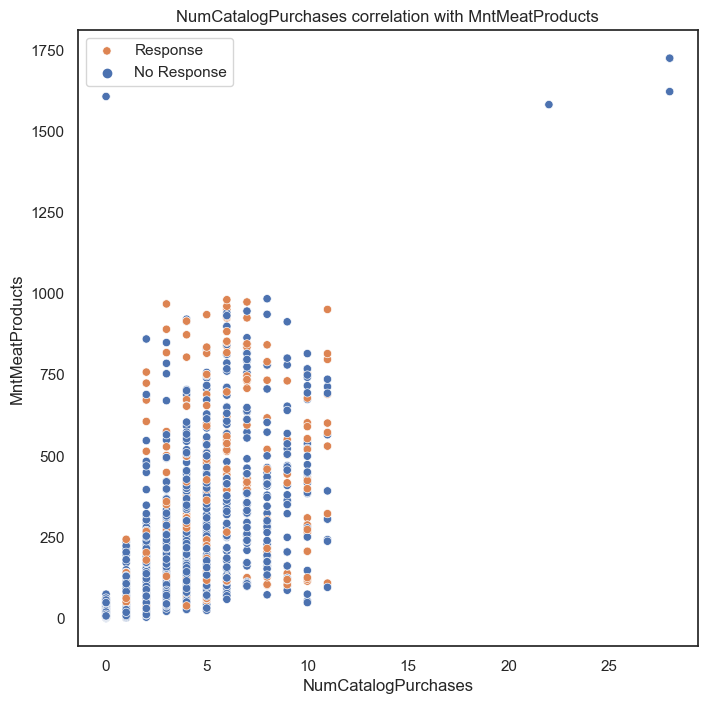

Correlation Coefficient %: 0.72
-----------------------------------------------------------


In [16]:
#create function for plotting scatter plot
def display_scatterplot(df, col1, col2):
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=df, x=col1, y=col2, hue='Response')
    plt.title(col1 + ' correlation with ' + col2)
    plt.legend(['Response', 'No Response'])
    plt.show()

#Plots 5 features that have a med-high correlation selected from the above correlation matrix
corr_features = [['Income', 'MntTotal'], ['Income', 'NumWebVisitsMonth'], ['MntWines', 'MntMeatProducts'],
['NumStorePurchases', 'MntWines'], ['NumCatalogPurchases', 'MntMeatProducts']]
corr_mx = df_fe.corr()

for corr in corr_features:
    display_scatterplot(df_fe, corr[0], corr[1])
    print('Correlation Coefficient %:', round((corr_mx.loc[corr[0], corr[1]]), 2))
    print('-----------------------------------------------------------')

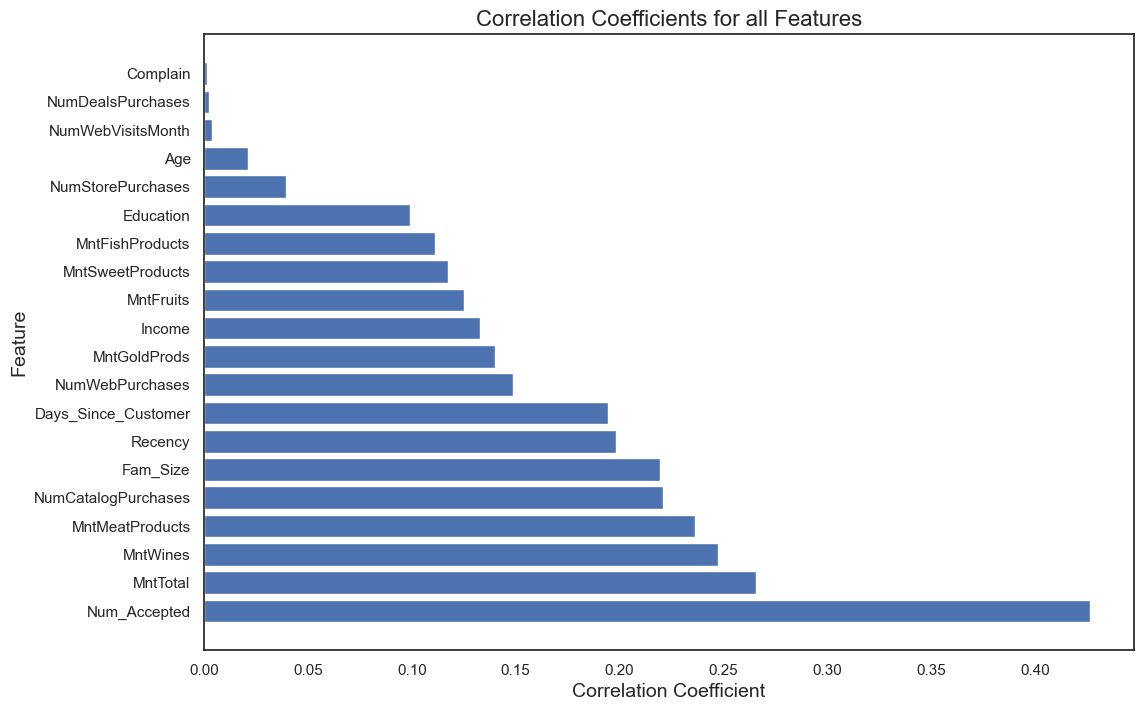

In [18]:
# visualise the correlation coefficient percentages for all features
plt.figure(figsize=(12, 8))
plt.barh(response_corr_abs.index, response_corr_abs.values)
plt.title('Correlation Coefficients for all Features', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

Num_Accepted           0.387815
NumCatalogPurchases    0.233216
MntTotal               0.231221
MntMeatProducts        0.223192
MntWines               0.199046
Days_Since_Customer    0.194673
MntGoldProds           0.183334
NumWebPurchases        0.172775
Income                 0.160010
MntFruits              0.148925
MntSweetProducts       0.136569
MntFishProducts        0.115421
Education              0.094713
NumStorePurchases      0.053361
NumWebVisitsMonth      0.010737
Complain              -0.001707
Age                   -0.020730
NumDealsPurchases     -0.035921
Recency               -0.198169
Fam_Size              -0.210452
Name: Response, dtype: float64


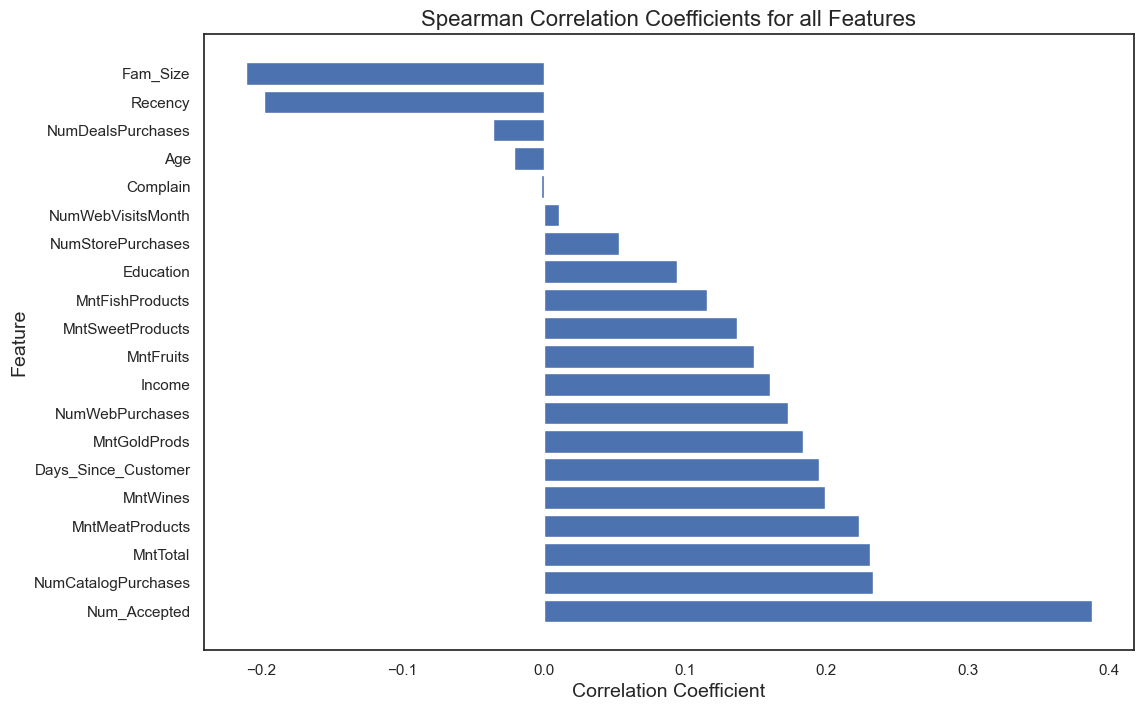

In [22]:
# get more information about the correlation coefficients against the 'Response' column using spearman's rank correlation

# create a spearman correlation matrix
sp_corr = df_fe.corr(method='spearman')
print(sp_corr['Response'].sort_values(ascending=False)[1:])

# visualise the correlation coefficient percentages for all features
plt.figure(figsize=(12, 8))
plt.barh(sp_corr['Response'].sort_values(ascending=False)[1:].index, sp_corr['Response'].sort_values(ascending=False)[1:].values)
plt.title('Spearman Correlation Coefficients for all Features', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

#### Inference till now ####

- Positive response to previous marketing campaigns was the most correlated with a response to the most recent ad campaign. This shows that possibly the customers are very happy with the marketing campaigns and decide to respond to the next campaign. Or this could be showing a certain group of customers that are more influenced by the campaigns.

- Total amount spent on products, especially wines and meats, are very highly correlated with whether the customer responded to the marketing campaign. However, amount spent on gold, fish, sweets and fish were not as correlated. This could be due to the nature of the most recent marketing campaign - perhaps the store was trying to sell meat and wine in the most recent campaign?

- Catalog purchases correlate with response to the current marketing campaign where as in store, online, and deal purchases have very little to no correlation. This may be due to the medium that the marketing campaign was using - maybe it was not displayed in store/online but was in all the catalogs? Another possibility is that those customers who perform catalog purchases are more influenced by the campaigns.

- Customers with smaller family size responded better to the marketing campaign. Maybe the customers without family had more money to spend on the products in the campaign or the products in the campaign were for single customers (like alcohol and party supplies). Without further information on the details on the campaign it is hard to say.

- Customers who recently purchased something are likely to respond to the marketing campaign. This is pretty clear - more recent purchases = probable pattern of shopping at the store.

- Income and Total Amount Spent are very correlated. Customers who earn more spend more.

- Finally, of note is Age and Complaining had virtually 0 correlation with response. This shows that the campaign did a good job of catering to all age groups and that customers who complained in the past continued business at the store.